# Diabetes Dataset

## Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

## Content

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. Features are:

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1)

# Imports

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1.1 - Read the data

you can find it in `../data/diabetes.csv`

In [2]:
# df = ...      
df = pd.read_csv('../data/diabetes.csv')  

# Exercise 1.2 - Display the 5 rows of the dataset

In [3]:
# ...
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exercise 1.3 - How many rows and columns does the dataset have?

In [4]:
nrows,ncols = df.shape

In [5]:
# run this cell to see the values of nrows and ncols
print(f"Number of rows of my dataset: {nrows}")
print(f"Number of columns of my dataset: {ncols}")

Number of rows of my dataset: 768
Number of columns of my dataset: 9


# Exercise 1.4 - Define the features and the target

You want to use every feature you have available, but don't forget that the target is the `Outcome` column.

In [7]:
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

# Exercise 1.5 - Train a Logistic Regression on this data

In [8]:
# initialize the model
model = LogisticRegression()

# fit/train the model
model.fit(X,y)

c:\Users\sailo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Exercise 1.6 - Report the accuracy of the model

In [24]:
# preds = ...
# accuracy = ...
preds = model.predict(X)
accuracy = (preds == y).sum() / len(y)
accuracy

0.7825520833333334

## Easy version

do it "manually" like it was done in the Learning Notebook

In [44]:
probas = model.predict_proba(X)[:,1]
probas
decision_threshold = 0.49
preds = (probas > decision_threshold).astype(int)
accuracy = (preds == y).sum() / len(y)
accuracy

0.7864583333333334

## Not-so-easy version

Create a function that receives a list of the model's coeficients, and a list of the respective feature names, and returns the top 2 features that impact the model's prediction the most. 

*hint:* Solve this with the help of [np.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) might be a helpful function here...

In [90]:
def get_top_2_features(coefs, feature_names):
    top_2_features = []
    x = np.array(coefs)
    sorted_array = np.argsort(x)
    for x in range(len(sorted_array[0])):
        if x >= len(sorted_array[0])-2:
            print(sorted_array[0][x])
            top_2_features.append(feature_names[sorted_array[0][x]])
    return top_2_features

print(get_top_2_features(model.coef_,X.columns))


0
6
['Pregnancies', 'DiabetesPedigreeFunction']


# Exercise 1.8 - Plot the decision boundary using Age and DiabetesPedigreeFunction

c:\Users\sailo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


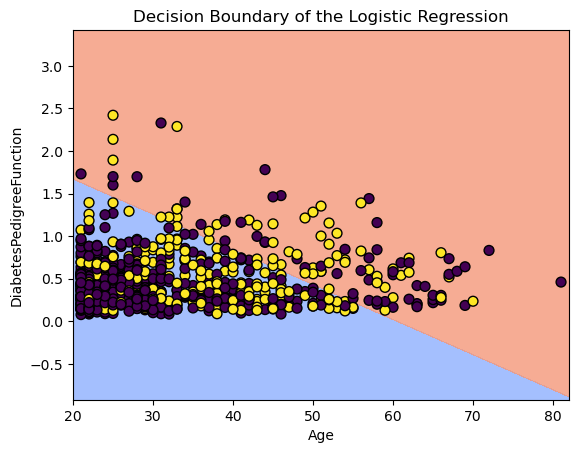

c:\Users\sailo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


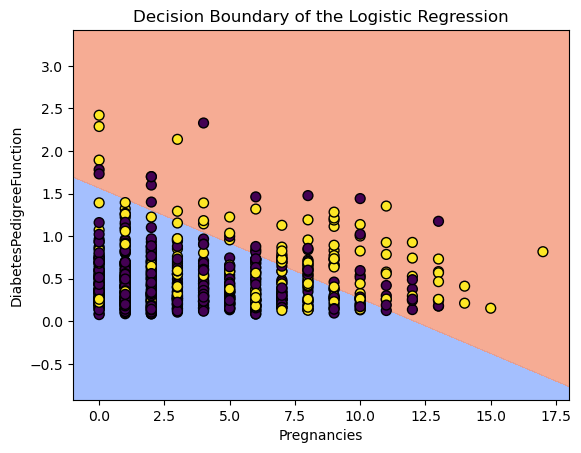

In [99]:
def plot_decision_boundary(feature_a : pd.Series,
                           feature_b : pd.Series,
                           target : pd.Series,
                           threshold : float = 0.5
                          ):

    X = pd.concat([feature_a,feature_b],axis=1)
    model = LogisticRegression()
    model.fit(X,target)

    xx, yy = np.meshgrid(np.linspace(feature_a.min() - 1, feature_a.max() +1, 100), 
                         np.linspace(feature_b.min()-1, feature_b.max()+1, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)
    plt.contourf(xx, yy, probs, levels=[0, threshold, 1], cmap='coolwarm', alpha=0.8)
    plt.scatter(feature_a, feature_b, c=target, edgecolors='k', marker='o', s=50)
    plt.xlabel(f'{feature_a.name}')
    plt.ylabel(f'{feature_b.name}')
    plt.title('Decision Boundary of the Logistic Regression')
    plt.show()

plot_decision_boundary(feature_a = X['Age'],
                       feature_b = X['DiabetesPedigreeFunction'],
                       target = y, 
                       threshold = 0.5)

plot_decision_boundary(feature_a = X['Pregnancies'],
                       feature_b = X['DiabetesPedigreeFunction'],
                       target = y, 
                       threshold = 0.5)